In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To choose a perfect model, we can run a loop to check for errors in models of different degrees
# 
# Create a different order polynomial
# Split poly into train and test
# Fit on train
# Store/Save RMSE on both train and test
# Plot the results - Error vs degree

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("C:\\Users\\MansiJadhav\\Python-for-Machine-Learning-&-Data-Science-Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\\08-Linear-Regression-Models\\Advertising.csv")

In [5]:
X = df.drop('sales', axis=1)

In [6]:
y = df['sales']

In [21]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train,X_test,y_train,y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [22]:
train_rmse_errors

[1.7345941243293763,
 0.587957408529223,
 0.4339344356902067,
 0.35170836883993584,
 0.2509342962728227,
 0.1994556133865361,
 5.418481285535737,
 0.1508621033579802,
 0.17175170448632276]

In [23]:
test_rmse_errors

[1.5161519375993875,
 0.6646431757268965,
 0.5803286825240505,
 0.5077742641892913,
 2.575808121294812,
 4.263812349320766,
 1383.4052620420694,
 3733.4225752445113,
 95489.26452707677]

Text(0, 0.5, 'RMSE')

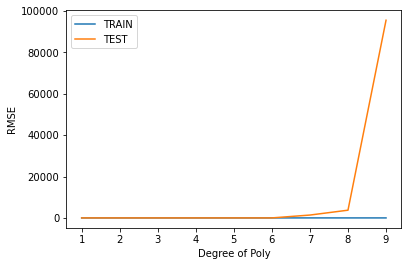

In [29]:
plt.plot(range(1,10), train_rmse_errors, label = 'TRAIN')
plt.plot(range(1,10), test_rmse_errors, label = 'TEST')
plt.legend()
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')

In [30]:
# Note that upto a certain degree the model is fine - Good model
# After a point, it becomes overfitted -> Train - Good, Test - Bad

Text(0, 0.5, 'RMSE')

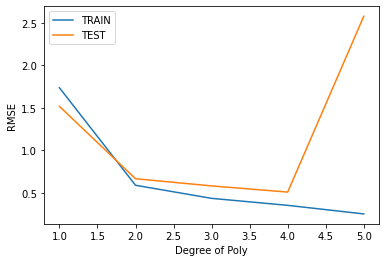

In [31]:
plt.plot(range(1,6), train_rmse_errors[:5], label = 'TRAIN')
plt.plot(range(1,6), test_rmse_errors[:5], label = 'TEST')
plt.legend()
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')

In [32]:
# We could choose upto degree 4 as error is the least in both train and test
# But always better to choose 2 or 3 - good complexity
# Above 4, we see spike in error 

In [33]:
# Let's choose degree 3
# Now let's deploy this model for degree 3

In [34]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [35]:
final_model = LinearRegression()

In [36]:
full_converted_X = final_poly_converter.fit_transform(X)  # Convert the whole data set

In [38]:
final_model.fit(full_converted_X, y)       # Fit the model on whole data set - converted to degree 3

LinearRegression()

In [39]:
from joblib import dump, load

In [42]:
dump(final_model, 'final_poly_model.joblib')  # Save model

['final_poly_model.joblib']

In [44]:
dump(final_poly_converter, 'final_converter.joblib')   # Save converter

['final_converter.joblib']

In [46]:
loaded_converter = load('final_converter.joblib')   # Load converter

In [47]:
loaded_model = load('final_poly_model.joblib')      # Load model

In [48]:
campaign = [[149,22,12]]

In [49]:
transformed_data = loaded_converter.fit_transform(campaign) # Use this final converter to convert any polynomial

In [50]:
loaded_model.predict(transformed_data)    # Just use the final loaded model to predict - Already trained

array([14.64501014])